In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from math import sqrt,exp,pi

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


In [4]:
import os
os.getcwd()

'C:\\Users\\tejas\\Downloads'

In [84]:
os.chdir(r'/content/drive/MyDrive')

In [61]:
train_data = pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Train')
test_data =  pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Test')

In [62]:
x_train = train_data.drop(['House ID','Construction type'],axis =1)
y_train = train_data['Construction type']

In [63]:
x_test = test_data.drop(['House ID','Construction type'],axis= 1)
y_test = test_data['Construction type']

# Question 1 - Naive Bayes

In [64]:
class naive_bayes():
  def __init__(self):
    self.classes = {}
    self.distribution_params = {}

  # Mean
  def mean(self,vectors):
	  return np.mean(np.array(vectors),axis=0)
   
  # Standard Deviation
  def std(self,vectors):
    return np.std(np.array(vectors),axis=0)

  # Calculate Probability
  def calculate_probability(self,x, mean, std):
    exponent = np.exp(-((x-mean)**2 / (2 * std**2 )))
    return((1 / (sqrt(2 * pi) * std))*exponent)

  # Training the Model
  def fit(self,x_train,y_train):
    for vect,clas in zip(np.array(x_train),y_train):
      if clas not in list(self.classes.keys()):
        self.classes[clas] = list()
        self.classes[clas].append(list(vect))
      else:
        self.classes[clas].append(list(vect))

    keys = list(self.classes.keys())
    for key in keys:
      prob_key = len(self.classes[key])/len(x_train)
      means = self.mean(self.classes[key])
      stds  = self.std(self.classes[key])
      self.distribution_params[key] = list()
      self.distribution_params[key].append((means,stds,prob_key))
    return(self.distribution_params)

  # Predict Probablities and Class
  def predict(self,x_test):
    pred = []
    result_probs = []
    for vec in np.array(x_test):
      classes = list(self.distribution_params.keys())
      probabs = []
      temp = {}
      for class_ in classes:
        means,stds,class_prob = self.distribution_params[class_][0]
        prob = np.prod((self.calculate_probability(vec,means,stds)))*class_prob
        probabs.append(prob)
        temp[class_] = prob
      # MAP
      pred.append(classes[np.argsort(probabs)[-1]])
      # Probabilities
      result_probs.append(temp)

    return(pred,result_probs)

In [65]:
#Fiiting the model
model = naive_bayes()
mfit = model.fit(x_train,y_train)

In [66]:
#Prediction
output_prediction,prediction_prob = model.predict(x_test)

In [67]:
output_prediction

['House', 'Apartment', 'Apartment', 'Apartment', 'Condo']

In [68]:
prediction_prob

[{'Apartment': 3.3329702414046057e-06,
  'House': 2.2383257200154047e-05,
  'Condo': 3.1493774835098834e-06},
 {'Apartment': 6.458538667459791e-07,
  'House': 2.2866649189072155e-14,
  'Condo': 3.401662412938181e-07},
 {'Apartment': 6.075887892129977e-08,
  'House': 2.70519353178464e-10,
  'Condo': 1.93427136089039e-08},
 {'Apartment': 1.761588088715833e-06,
  'House': 1.931992729271351e-17,
  'Condo': 1.6683949961126984e-06},
 {'Apartment': 5.263002155189463e-07,
  'House': 8.811131914127028e-36,
  'Condo': 6.010079401265222e-07}]

# Question 2 - Decision Tree

### Use the default parameters:

In [22]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state=123)
DT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [28]:
DT.classes_

array(['Apartment', 'Condo', 'House'], dtype=object)

### What is the accuracy on the training and testing set?

In [25]:
print('Accuracy on training set: {0}'.format(DT.score(x_train,y_train)))
print('Accuracy on Testing: {0}'.format(DT.score(x_test,y_test)))

Accuracy on training set: 1.0
Accuracy on Testing: 0.4


### Confusion Matrix 

[[7 0 0]
 [0 6 0]
 [0 0 7]]


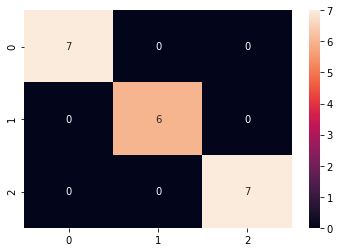

In [33]:
#Train
y_pred = DT.predict(x_train)
c_mat = confusion_matrix(y_pred,y_train)
print(c_mat)
sns.heatmap(c_mat,annot=True)

[[2 0 0]
 [1 0 2]
 [0 0 0]]


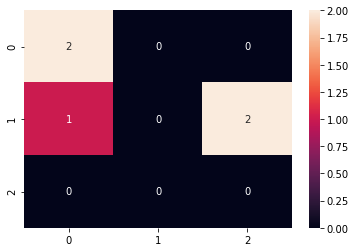

In [34]:
#Test
y_pred = DT.predict(x_test)
c_mat = confusion_matrix(y_pred,y_test)
print(c_mat)
sns.heatmap(c_mat,annot=True)

## Model has accuracy of 1 i.e., 100% on training set and an accuracy of 0.4 i.e., 40% on test set. Clearly overfitting.

### What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value:

In [36]:
max_depths = np.arange(1,9)
train_acc = []
test_acc = []
for depth in max_depths:
    DT = DecisionTreeClassifier(random_state=123,max_depth=depth)
    DT.fit(x_train, y_train)
    train_acc.append(DT.score(x_train,y_train))
    test_acc.append(DT.score(x_test,y_test))

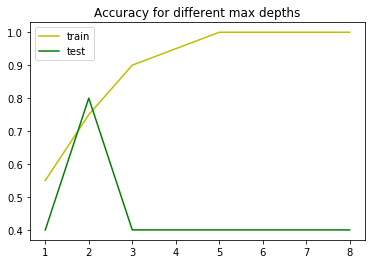

In [40]:
plt.plot(max_depths,train_acc,'y')
plt.plot(max_depths,test_acc,'g')
plt.title("Accuracy for different max depths")
plt.legend(['train','test'])
# plt.ylim((0,3))
plt.show()

## As max depth increase the training accruracy incresed but the testing accuracy increased till max depth 2 and dropped flat after max depth 3

### Best Value

In [41]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state=123,max_depth=2)
DT.fit(x_train, y_train)
print('Accuracy on training data: {0}'.format(DT.score(x_train,y_train)))
print('Accuracy on testing data: {0}'.format(DT.score(x_test,y_test)))

Accuracy on training data: 0.75
Accuracy on testing data: 0.8


## As we let the tree grow at max depth i.e., a fully grown tree, it overfits, it starts to memorize even the noise in the data, which is why it was performing best on training where as giving poor results for testing. By restricting the depth of the decision tree, we stop the model from overfitting, reducing complexity - decresing variance, increasing bias. As shown above when we restrict the max depth to 2, the training and test accuracies are 0.75, 0.8 respectively resulting in a more stable and reliable model.

### Visualize the resulting tree:

#### Max depth tree:

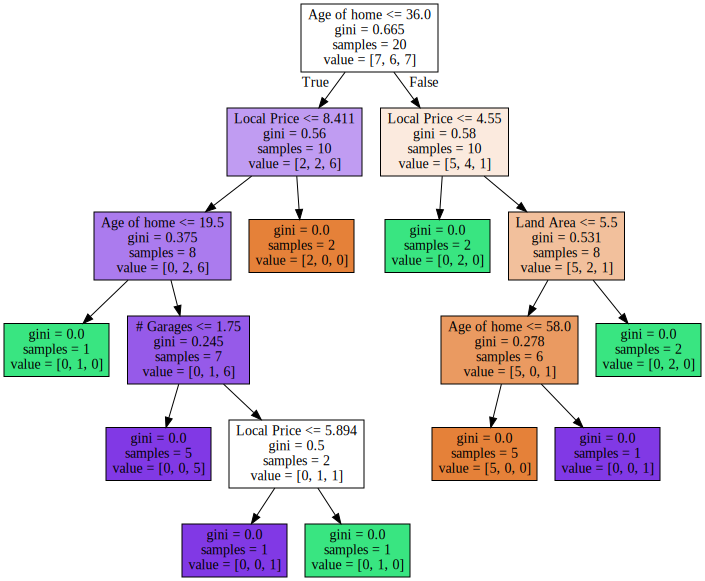

In [47]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state=123)
DT.fit(x_train, y_train)
data = export_graphviz(DT, out_file=None, 
                                feature_names=list(x_train.columns),  
                                filled=True)
graphviz.Source(data, format="png")

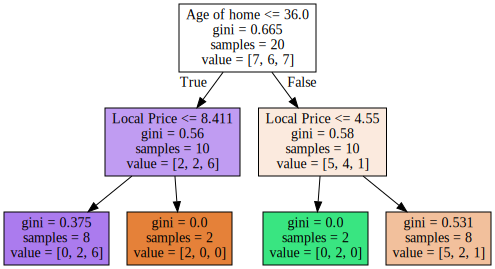

In [50]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state=123, max_depth=2)
DT.fit(x_train, y_train)
data = export_graphviz(DT, out_file=None, 
                                feature_names=list(x_train.columns),  
                                filled=True)
graphviz.Source(data, format="png")

## In the given sample example, age of home is 23 which is <= 36 true and the local price is 9.03 which is greater than 8.41. So the data is classfied into the orange leaf of '' gini = 0.0 and samples = 2, value = [2,0,0]''

# Question 3 - knn

In [70]:
#Strandardization
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [74]:
class KNN():
  def __init__(self,neighbours):
    self.neighbours = neighbours

  def fit(self,x_train,y_train):
    self.vectors = x_train
    self.classes = y_train

  def predict(self,x_test):
    final_labels = []
    for vector in x_test:
        distances = []
        for stored_vector in self.vectors:
            distances.append(np.linalg.norm(vector-stored_vector))
        distances = np.array(distances)
        dist = np.argsort(distances)[:self.neighbours]
        
        #Labels of the K datapoints from above
        labels = self.classes[dist]
      
        #find unique values in array along with their counts
        vals, counts = np.unique(labels, return_counts=True)
        
        # Majority Vote
        mode_value = np.argwhere(counts == np.max(counts))
        if len(mode_value) == 1:
            temp = (vals[mode_value].tolist())
            final_labels.append(temp[0][0])
        else:
            final_labels.append(list(labels)[0])

    return(final_labels)

In [75]:
#Fitting model
model = KNN(neighbours=5)
model.fit(x_train,y_train)
model.predict(x_test)

['Apartment', 'Apartment', 'House', 'Apartment', 'House']

### Accuracy for different number of neighbors:

In [76]:
neighbours = np.arange(1,6)
acc = []
for k in neighbours:
    model = KNN(neighbours=k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))

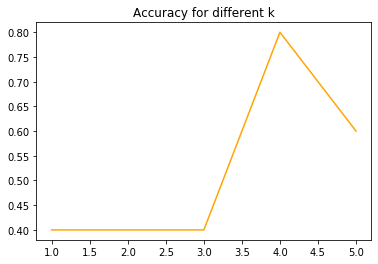

In [81]:
plt.plot(neighbours,acc,'orange')
plt.title("Accuracy for different k")
plt.show()

## As number of neighbours increased the accuracy stayed constant at 0.4 till 3 neighbours. Accuracy then increased and futher decresed with maximum accuracy at 4 neighbours. So k = 4 is the optimal number of neighbours